In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [46]:
dataset_dir = 'C:/Users/jahag/WOMEN_ANALYTICS/DATASETS/HARASSEMENT'

In [48]:
import os
import shutil
from sklearn.model_selection import train_test_split


source_dir = 'C:/Users/jahag/WOMEN_ANALYTICS/DATASETS/HARASSEMENT' 
train_dir = 'Train-Harass/train_new'
test_dir = 'Train-Harass/test_new'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def split_data(source_dir, train_dir, test_dir, test_size=0.2):
    
    for class_folder in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_folder)
        if os.path.isdir(class_path):
            
            all_files = [os.path.join(class_path, file) for file in os.listdir(class_path)
                         if file.endswith(('jpg', 'jpeg', 'png'))]  # Add relevant image formats
            
            
            if not all_files:
                print(f"No images found in directory: {class_path}")
            else:
                print(f"Found {len(all_files)} images in {class_folder}")
            
           
            train_files, test_files = train_test_split(all_files, test_size=test_size, random_state=42)
            
            
            class_train_dir = os.path.join(train_dir, class_folder)
            class_test_dir = os.path.join(test_dir, class_folder)
            os.makedirs(class_train_dir, exist_ok=True)
            os.makedirs(class_test_dir, exist_ok=True)
            
            
            for file in train_files:
                shutil.copy(file, os.path.join(class_train_dir, os.path.basename(file)))
                
            for file in test_files:
                shutil.copy(file, os.path.join(class_test_dir, os.path.basename(file)))


split_data(source_dir, train_dir, test_dir, test_size=0.2)



Found 1010 images in Harassment
Found 1095 images in Non-Harassment


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 1684 images belonging to 2 classes.
Found 421 images belonging to 2 classes.


In [50]:

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [51]:

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [52]:

model = Model(inputs=base_model.input, outputs=predictions)

In [53]:

for layer in base_model.layers:
    layer.trainable = False

In [54]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [56]:

history = model.fit(train_generator,
                    epochs=15,
                    validation_data=test_generator,
                    verbose=1)

Epoch 1/15


C:\Users\jahag\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.7415 - loss: 0.5167 - val_accuracy: 0.8409 - val_loss: 0.3629
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8572 - loss: 0.3295 - val_accuracy: 0.8622 - val_loss: 0.3003
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8919 - loss: 0.2661 - val_accuracy: 0.8599 - val_loss: 0.3432
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.8867 - loss: 0.2598 - val_accuracy: 0.8836 - val_loss: 0.3035
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9223 - loss: 0.2242 - val_accuracy: 0.8907 - val_loss: 0.2761
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9225 - loss: 0.1981 - val_accuracy: 0.8955 - val_loss: 0.2743
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9211 - loss: 0.2057 - val_accuracy: 0.8599 - val_loss: 0.3131
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9319 - loss: 0.1799 - val_accuracy: 0.8860 - val_loss: 0.275

In [64]:

for layer in base_model.layers:
    layer.trainable = True

In [66]:

for layer in base_model.layers:
    layer.trainable = True

In [68]:

model.compile(optimizer=Adam(learning_rate=0.00001),  
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [70]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

In [72]:

model.compile(optimizer=Adam(learning_rate=0.00001),  
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

In [76]:

history_fine_tune = model.fit(train_generator,
                              epochs=10,
                              validation_data=test_generator,
                              callbacks=[early_stopping, reduce_lr])

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 371s 4s/step - accuracy: 0.8210 - loss: 0.4148 - val_accuracy: 0.8812 - val_loss: 0.2834 - learning_rate: 1.0000e-05
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.8755 - loss: 0.2777 - val_accuracy: 0.8884 - val_loss: 0.2654 - learning_rate: 1.0000e-05
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.8964 - loss: 0.2464 - val_accuracy: 0.8812 - val_loss: 0.2723 - learning_rate: 1.0000e-05
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 232s 4s/step - accuracy: 0.9161 - loss: 0.2090 - val_accuracy: 0.8884 - val_loss: 0.2699 - learning_rate: 1.0000e-05
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.9273 - loss: 0.1976 - val_accuracy: 0.8955 - val_loss: 0.2683 - learning_rate: 2.0000e-06


In [120]:

model.save('harassment(N_1k)_mobilenetv2hack_h5.h5')

model.save('harassment(N_1k)_mobilenetv2hack_keras.keras')


import pickle

# Save the model architecture
model_json = model.to_json()
with open("harassment(N_1k)_mobilenetv2hack.pkl", "wb") as file:
    pickle.dump(model_json, file)

# Save the weights
model.save_weights("harassment(N_1k)_mobilenetv2hack.weights.h5")


In [78]:

def predict_image(img_path):
    
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    confidence = predictions[0][0]
    class_label = class_names[int(predictions[0][0] > 0.5)]

    return class_label, confidence

def display_image(img_path):
    
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
Predicted Class: Harassment, Confidence: 0.21


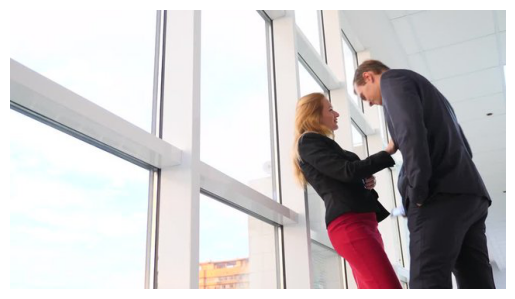

In [80]:
img_path = 'C:/Users/jahag/WOMEN_ANALYTICS/DATASETS/HARASSEMENT/Harassment/360_F_177446466_c0Dw7IxRbmTDSsN9CAm5CpRmiNToHOcj.jpg'  # Replace with your test image path
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
Predicted Class: Non-Harassment, Confidence: 0.99


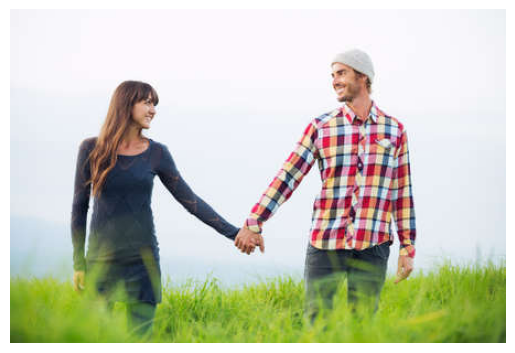

In [82]:
img_path = "C:/Users/jahag/WOMEN_ANALYTICS/DATASETS/HARASSEMENT/Non-Harassment/34688504-romantic-young-couple-in-love-outdoors.jpg"
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Predicted Class: Non-Harassment, Confidence: 0.98


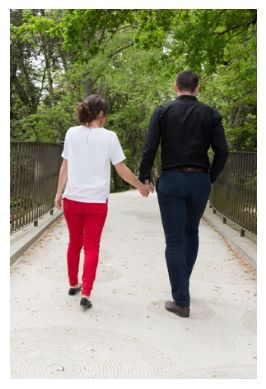

In [84]:
img_path = 'C:/Users/jahag/WOMEN_ANALYTICS/DATASETS/HARASSEMENT/Non-Harassment/39417154-rear-view-of-a-smiling-couple-holding-hands-and-walking-on-country-road.jpg'  
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Predicted Class: Harassment, Confidence: 0.12


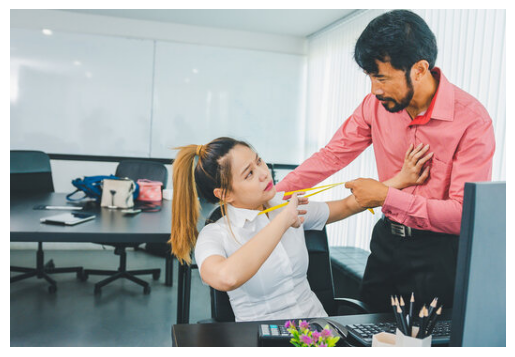

In [86]:
img_path = 'C:/Users/jahag/WOMEN_ANALYTICS/DATASETS/HARASSEMENT/Harassment/360_F_728146551_qOBqFTHjThuVnv0XFR1bQwDnuAuLAfEc.jpg'  
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted Class: Non-Harassment, Confidence: 0.99


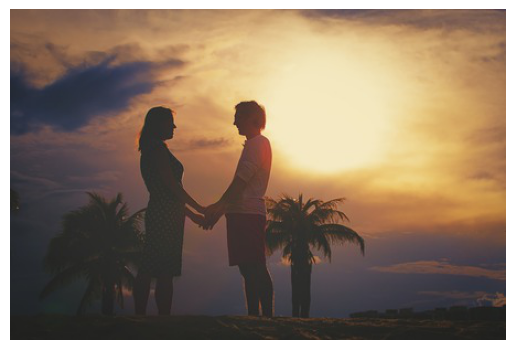

In [112]:
img_path = 'C:/Users/jahag/WOMEN_ANALYTICS/DATASETS/HARASSEMENT/Non-Harassment/73513364-happy-loving-couple-at-sunset-tropical-beach.jpg'  
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted Class: Non-Harassment, Confidence: 0.72


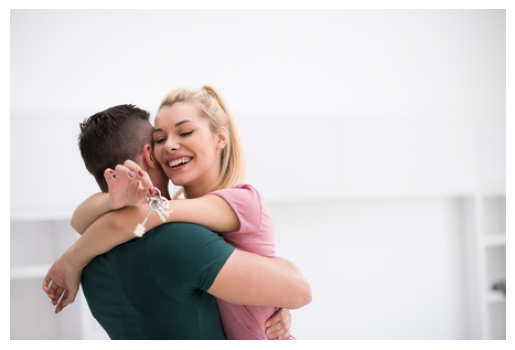

In [88]:
img_path = 'C:\\Users\\jahag\\WOMEN_ANALYTICS\\DATASETS\\HARASSEMENT\\Non-Harassment\\73542459-excited-happy-young-couple-looking-forward-to-moving-into-a-new-home.jpg'
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Predicted Class: Non-Harassment, Confidence: 0.99


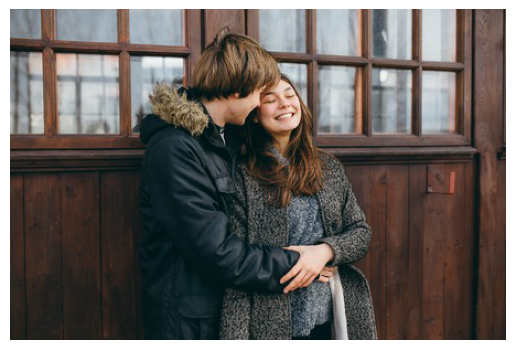

In [92]:
img_path = 'C:\\Users\\jahag\\WOMEN_ANALYTICS\\DATASETS\\HARASSEMENT\\Non-Harassment\\70054933-beautiful-young-adult-couple-posing-at-camera.jpg'
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Predicted Class: Non-Harassment, Confidence: 1.00


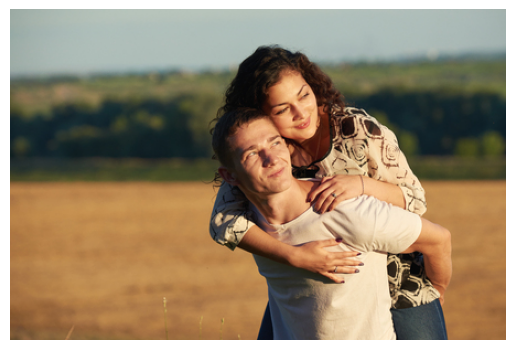

In [94]:
img_path = 'C:\\Users\\jahag\\WOMEN_ANALYTICS\\DATASETS\\HARASSEMENT\\Non-Harassment\\63254597-romantic-young-couple-having-fun-on-wheaten-field-background-at-evening-summer-season-girl-riding-on.jpg'
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Class: Harassment, Confidence: 0.00


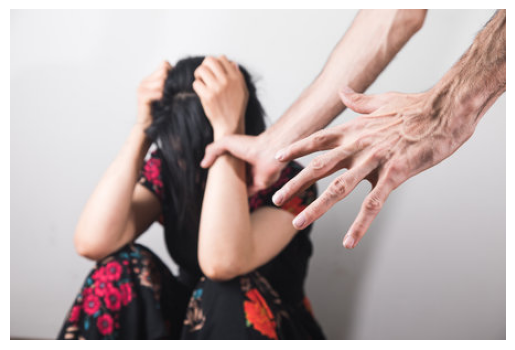

In [33]:
img_path = '/Users/arunaa/SIH/Train-Harass/Harassment/222600449-husband-beats-his-wife-domestic-violence.jpg'  
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Predicted Class: Harassment, Confidence: 0.21


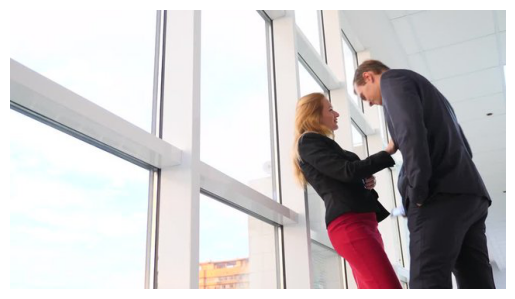

In [96]:
img_path = 'C:\\Users\\jahag\\WOMEN_ANALYTICS\\DATASETS\\HARASSEMENT\\Harassment\\360_F_177446466_c0Dw7IxRbmTDSsN9CAm5CpRmiNToHOcj.jpg'
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Predicted Class: Non-Harassment, Confidence: 0.98


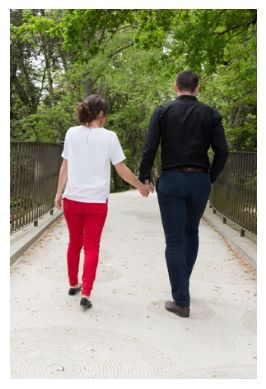

In [98]:
img_path = 'C:\\Users\\jahag\\WOMEN_ANALYTICS\\DATASETS\\HARASSEMENT\\Non-Harassment\\39417154-rear-view-of-a-smiling-couple-holding-hands-and-walking-on-country-road.jpg'
class_label, confidence = predict_image(img_path)
print(f'Predicted Class: {class_label}, Confidence: {confidence:.2f}')
display_image(img_path)


In [124]:
import cv2
import tensorflow as tf
import numpy as np

In [126]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = tf.keras.models.load_model('C:/Users/jahag/WOMEN_ANALYTICS/FINAL/Models/harassment(N_1k)_mobilenetv2stf.h5')

def process_frame(frame, model):
    
    img = cv2.resize(frame, (224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    
    # Print raw prediction and shape for debugging
    print(f"Raw prediction: {prediction}")
    print(f"Prediction shape: {prediction.shape}")
    
    # Adjust threshold if needed
    threshold = 0.7  # You can modify this threshold value
    if prediction[0][0] > threshold:
        label = 'Harassment'
        confidence = prediction[0][0]
    else:
        label = 'Non-Harassment'
        confidence = 1 - prediction[0][0]
    
    return label, confidence

cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()
    
    # Process the frame and get predictions
    label, confidence = process_frame(frame, model)
    
    # Display the resulting frame with the label
    cv2.putText(frame, f"{label} ({confidence:.2f})", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Harassment Detection', frame)
    
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Raw prediction: [[0.6729848]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Raw prediction: [[0.79178405]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raw prediction: [[0.76384807]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raw prediction: [[0.7095885]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Raw prediction: [[0.8697043]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Raw prediction: [[0.18429133]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Raw prediction: [[0.5022485]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Raw prediction: [[0.22810706]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Raw prediction: [[0.2768704]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Raw prediction: [[0.4009937]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Raw prediction: [[0.72415936]]

In [110]:

loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.8784 - loss: 0.2811
Test Accuracy: 88.84%


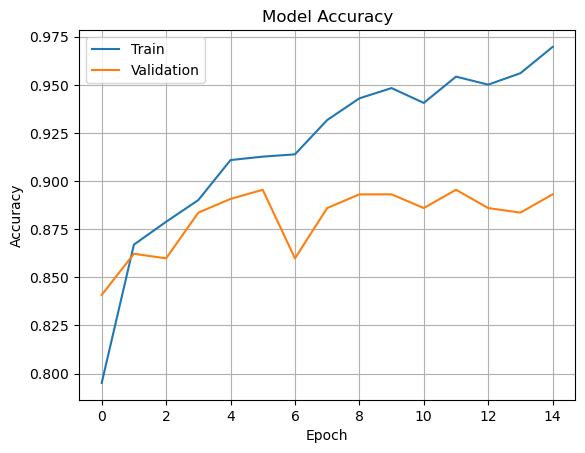

In [108]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()
